In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [4]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train_full[0]

5

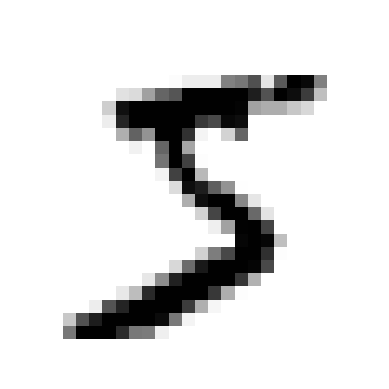

In [8]:
plt.imshow(X_train_full[0],cmap='binary')
plt.axis('off')
plt.show()

<Axes: >

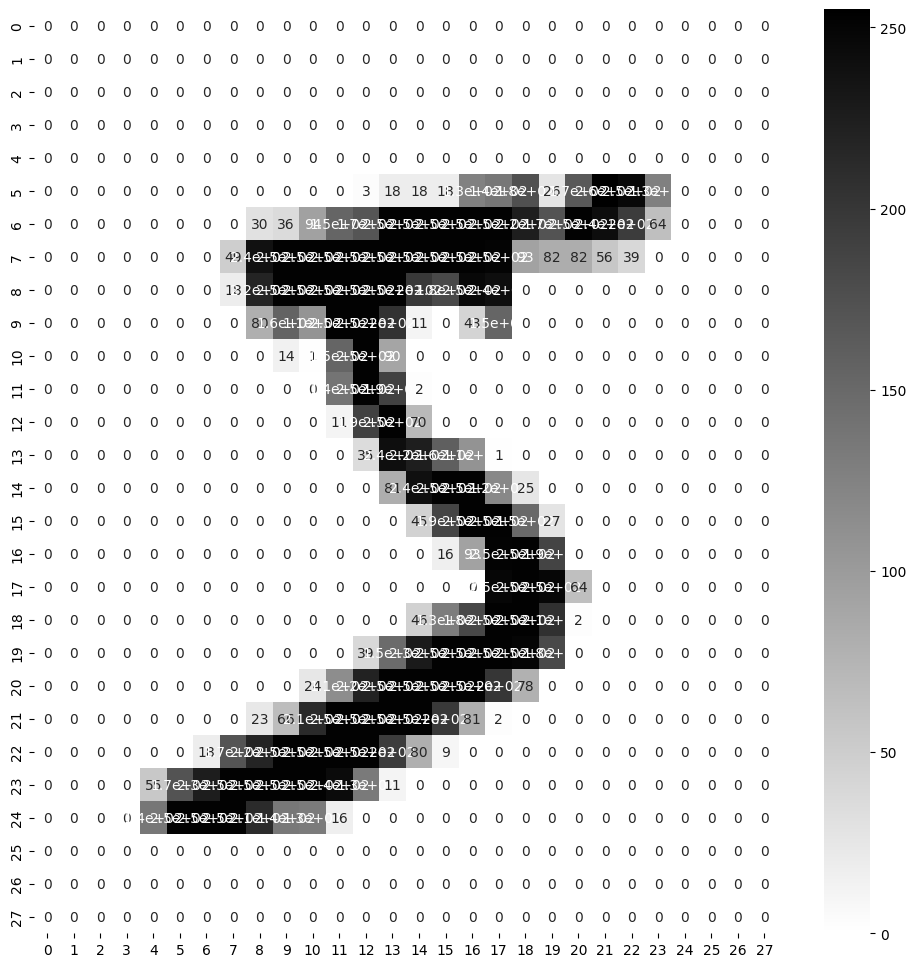

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[0],cmap='binary',annot=True)

In [10]:
# flatten the image?
# scaling the data between 0 to 1(unit scaling) by dividing it by 255 as its an unsigned data between 0-255 range.
X_valid, X_train = X_train_full[:5000]/255 , X_train_full[5000:]/255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [11]:
# scale the test data also
X_test = X_test/255

In [12]:
print(f'X_valid shape : {X_valid.shape}')
print(f'y_valid shape : {y_valid.shape}')
print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')




X_valid shape : (5000, 28, 28)
y_valid shape : (5000,)
X_train shape : (55000, 28, 28)
y_train shape : (55000,)


<Axes: >

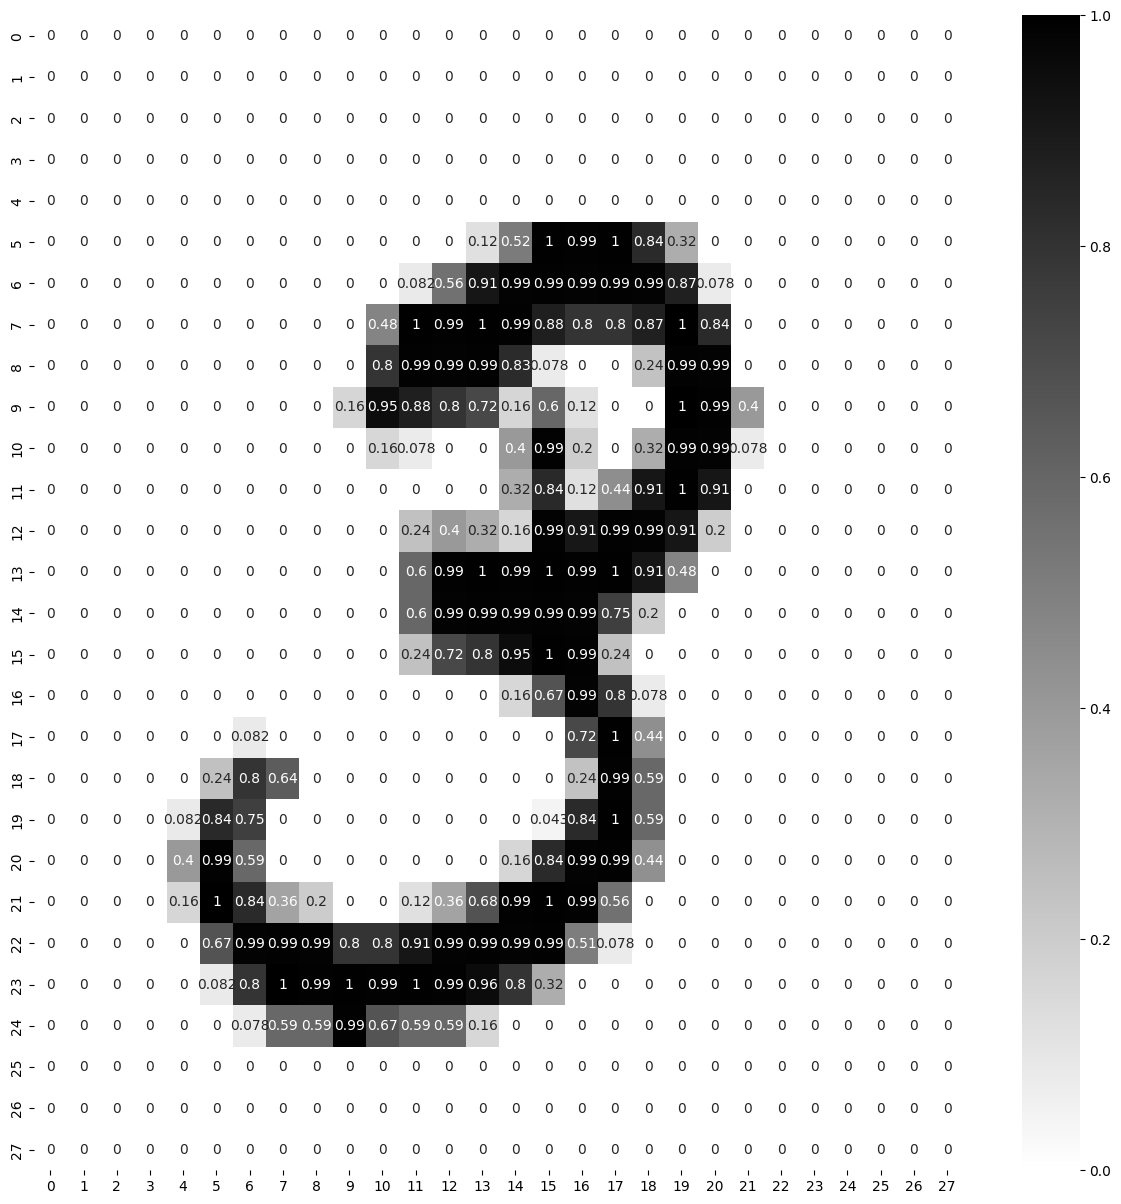

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1],cmap='binary',annot=True)

In [14]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
          tf.keras.layers.Dense(units=300,activation='relu',name='hiddenlayer1'),
          tf.keras.layers.Dense(units=100,activation='relu',name='hiddenlayer2'),
          tf.keras.layers.Dense(units=10,activation='softmax',name='outputlayer')]

In [15]:
classifier_model = tf.keras.models.Sequential(LAYERS)

In [16]:
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
classifier_model.layers

In [19]:
classifier_model.layers[1].name

'hiddenlayer1'

In [20]:
weight,bias = classifier_model.layers[1].get_weights()

In [21]:
weight

array([[-0.0548207 , -0.06382621,  0.00777567, ..., -0.05547429,
         0.04423716,  0.05609854],
       [-0.06539266, -0.01453915,  0.06168303, ...,  0.01507083,
        -0.01328083,  0.05409092],
       [-0.05205666,  0.00949101, -0.00952087, ...,  0.05735819,
        -0.01387774, -0.07138124],
       ...,
       [ 0.05353676,  0.02376931,  0.01305942, ..., -0.01487919,
        -0.01206871,  0.03281496],
       [ 0.05303012, -0.06400655,  0.03756296, ...,  0.0209773 ,
         0.00334015,  0.04010419],
       [-0.06335051, -0.01657409,  0.0715387 , ...,  0.04022261,
         0.03650768, -0.0203122 ]], dtype=float32)

In [22]:
VALIDATION_SET = (X_valid,y_valid)
model_history = classifier_model.fit(X_train,y_train,epochs=5,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2092 - accuracy: 0.9378 - val_loss: 0.1075 - val_accuracy: 0.9670
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0881 - accuracy: 0.9731 - val_loss: 0.0812 - val_accuracy: 0.9766
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9815 - val_loss: 0.0884 - val_accuracy: 0.9718
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.0847 - val_accuracy: 0.9792
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0886 - val_accuracy: 0.9752


In [23]:
model_history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [24]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.209163,0.937818,0.107520,0.9670
1,0.088103,0.973127,0.081181,0.9766
2,0.058655,0.981545,0.088382,0.9718
3,0.043778,0.985709,0.084660,0.9792
4,0.033346,0.988891,0.088586,0.9752


In [25]:
classifier_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0892 - accuracy: 0.9755


[0.08920273184776306, 0.9754999876022339]

In [26]:
import os
import time

def save_model(model_dir='saved_model'):
  os.makedirs(model_dir,exist_ok=True)
  file_name = time.strftime('model_%Y_%m_%d_%H_%M_%S_.h5')
  model_path = os.path.join(model_dir,file_name)
  print(f'your model will be saved at the following location\n{model_path}')
  return model_path

# saving the model
path = save_model()
classifier_model.save(path)

your model will be saved at the following location
saved_model/model_2024_01_05_10_50_14_.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# loading the model
from tensorflow import keras
loaded_model = keras.models.load_model('/content/saved_model/model_2024_01_05_10_20_11_.h5')


In [28]:
single_image = X_test[1]

<Axes: >

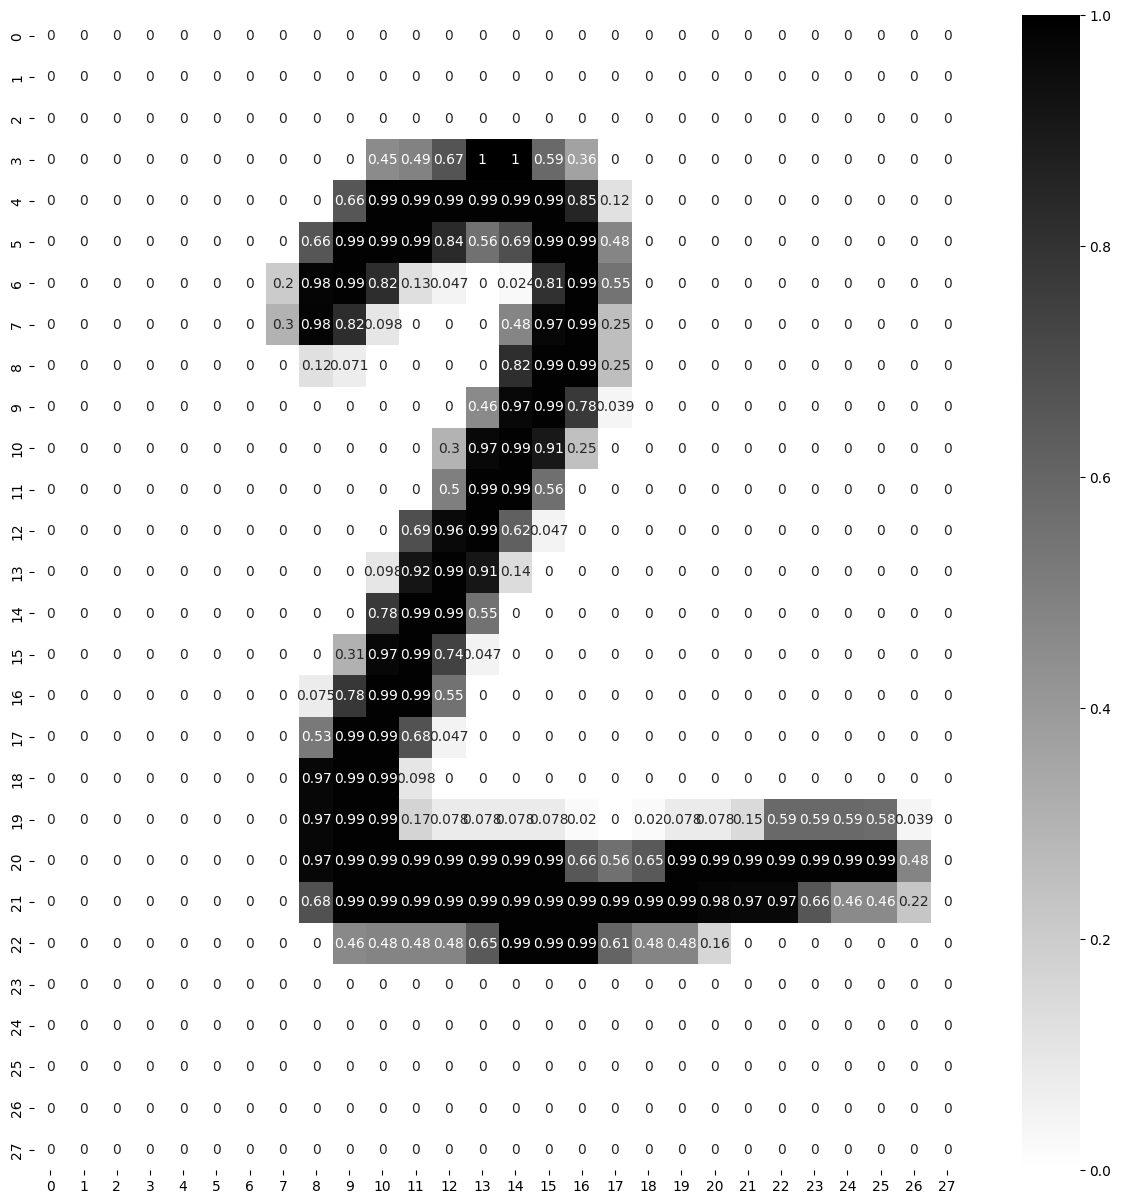

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(single_image,cmap='binary',annot=True)

In [30]:
single_image = np.reshape(single_image, (1, 28, 28))
predictions = loaded_model.predict(single_image)
predicted_class = np.argmax(predictions)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 152ms/step
Predicted Class: 2
